<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part7/P7_Ch01_CH04%2C05%2C06%2C07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST RNN Classifier

## 4. Data augmentation - Noise 추가 방법, one-hot encoding

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from IPython.display import Image

mnist = keras.datasets.mnist
(train_images, train_labels ), (test_images, test_labels) = mnist.load_data()
train_images = train_images/255
test_images = test_images/255


In [52]:
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.14965625134095117
0.33858893764418296
0.9641652621410293


In [53]:
print(np.random.random(size = (28,28)))

[[6.84065103e-01 6.58071754e-01 1.11461080e-01 4.31603025e-01
  8.58055384e-01 5.98489034e-01 5.70983555e-02 5.78309836e-01
  3.11893639e-01 5.55995274e-01 7.71033120e-01 1.61877445e-01
  2.10091704e-01 3.24084376e-01 2.93101065e-01 9.75894248e-01
  3.97881424e-01 4.44429746e-01 4.60995862e-01 4.41133473e-01
  8.77344694e-01 8.29238944e-01 1.48095781e-01 3.02364828e-01
  4.94001491e-01 3.31655910e-01 2.92713488e-01 3.42298829e-01]
 [2.56896809e-01 7.64208849e-01 9.47489172e-01 7.49186834e-01
  9.30250911e-01 2.88290628e-01 7.03379920e-01 3.06644032e-01
  4.84219443e-01 4.99701715e-01 9.45545309e-01 6.58777632e-01
  6.71526592e-02 5.36280821e-01 8.81407008e-01 1.94930082e-01
  9.51232719e-01 5.68050625e-01 6.67174253e-01 6.38259709e-01
  3.08557183e-01 6.86772855e-01 5.14026571e-01 3.94081318e-02
  6.27587099e-01 8.60070504e-01 4.84909779e-01 4.34486760e-01]
 [2.89679399e-01 9.40089271e-02 8.21445100e-01 1.87079412e-01
  5.68357616e-01 9.95821283e-01 2.01057569e-01 3.74233967e-01
  5.68

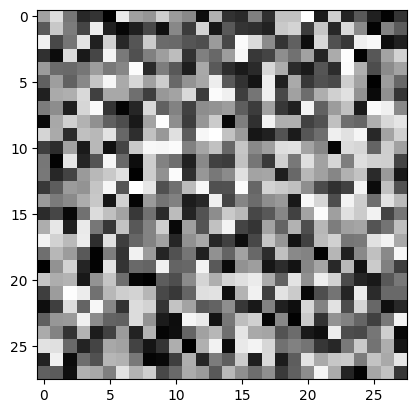

In [54]:
plt.imshow(np.random.random(size = (28,28)), cmap = 'gray')

In [55]:
print(np.random.normal(0,0.1,size =1))
print(np.random.normal(0,0.1,size =1))
print(np.random.normal(0,0.1,size =1))

[0.05564891]
[0.12014666]
[-0.06934451]


In [56]:
print(np.random.normal(3.0,0.01,size =1))
print(np.random.normal(3.0,0.01,size =1))
print(np.random.normal(3.0,0.01,size =1))


[3.00021346]
[2.99773474]
[2.98185418]


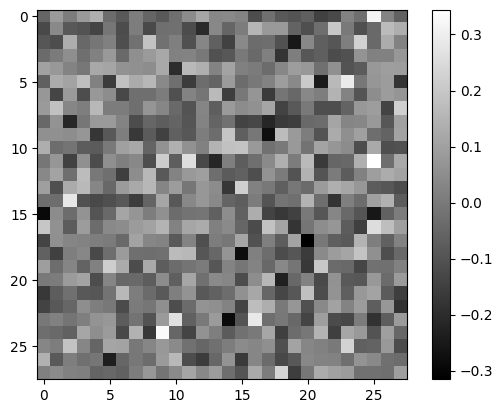

In [57]:
plt.imshow(np.random.normal(0,0.1,size =(28,28)), cmap='gray')
plt.colorbar()
plt.show()

In [58]:
noisy_image =train_images[5] + np.random.normal(0.5,0.1,size =(28,28))

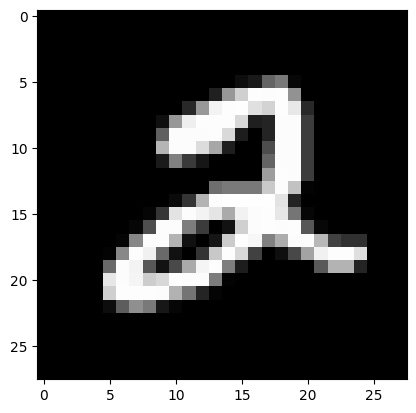

In [59]:
plt.imshow(noisy_image, cmap ='gray')
plt.show()

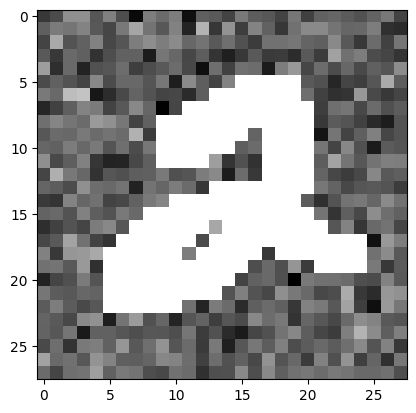

In [60]:
noisy_image[noisy_image > 1.0] =1.0
plt.imshow(noisy_image, cmap ='gray')

In [61]:
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images >1.0] =1.0

test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images >1.0] =1.0


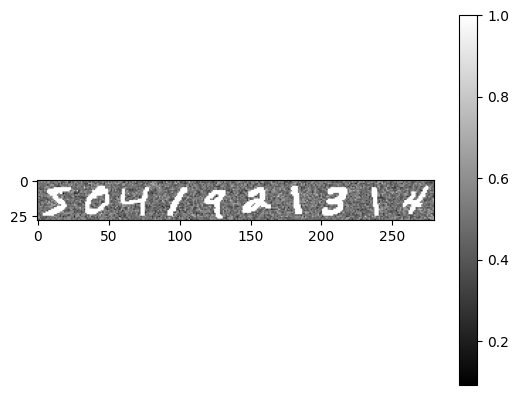

[5 0 4 1 9 2 1 3 1 4]


In [62]:
plt.imshow(train_noisy_images[:10].transpose((1,0,2)).reshape(28,-1), cmap ='gray')
plt.colorbar()
plt.show()
print(train_labels[:10])


In [63]:
# label -> one-hot encoding
from keras.utils import to_categorical
to_categorical(train_labels[0], 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [98]:
print(train_labels.shape,test_labels.shape )
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape,test_labels.shape )


(60000,) (10000,)
(60000, 10) (10000, 10)


## 5. 모델링

In [65]:
# input (28,28), 64 unit의 SimpleRNN , ouput 10unit의 fully connected 모델
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model

inputs = Input(shape=(28,28))
x1 = SimpleRNN(64, activation = 'tanh')(inputs)
x2 =Dense(10, activation = 'softmax')(x1)

model = Model(inputs, x2)


In [66]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 6602 (25.79 KB)
Trainable params: 6602 (25.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics= ['accuracy']
)

In [68]:
hist = model.fit(train_noisy_images, train_labels, validation_data=(test_noisy_images, test_labels), epochs = 5, verbose =2)

Epoch 1/5
1875/1875 - 15s - loss: 0.7089 - accuracy: 0.7755 - val_loss: 0.4369 - val_accuracy: 0.8668 - 15s/epoch - 8ms/step
Epoch 2/5
1875/1875 - 13s - loss: 0.3926 - accuracy: 0.8840 - val_loss: 0.3294 - val_accuracy: 0.9043 - 13s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 15s - loss: 0.3283 - accuracy: 0.9040 - val_loss: 0.3095 - val_accuracy: 0.9088 - 15s/epoch - 8ms/step
Epoch 4/5
1875/1875 - 15s - loss: 0.2970 - accuracy: 0.9120 - val_loss: 0.2821 - val_accuracy: 0.9216 - 15s/epoch - 8ms/step
Epoch 5/5
1875/1875 - 23s - loss: 0.2746 - accuracy: 0.9192 - val_loss: 0.2591 - val_accuracy: 0.9230 - 23s/epoch - 12ms/step


In [69]:
hist.history

{'loss': [0.708917498588562,
  0.392637699842453,
  0.32834792137145996,
  0.2969517707824707,
  0.2746064364910126],
 'accuracy': [0.7755166888237,
  0.8840000033378601,
  0.9040166735649109,
  0.9120333194732666,
  0.9192333221435547],
 'val_loss': [0.4368543326854706,
  0.3294384181499481,
  0.3095426559448242,
  0.2821301817893982,
  0.25906580686569214],
 'val_accuracy': [0.8668000102043152,
  0.9042999744415283,
  0.9088000059127808,
  0.9215999841690063,
  0.9229999780654907]}

<function matplotlib.pyplot.show(close=None, block=None)>

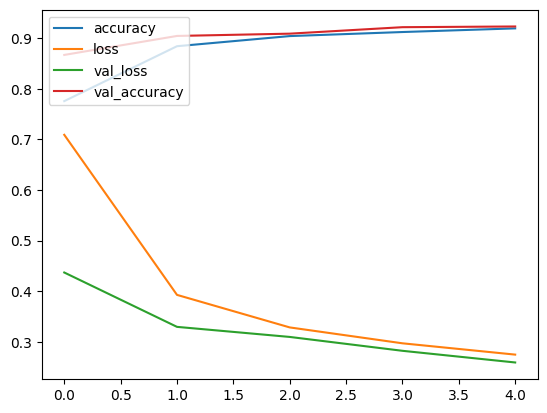

In [70]:
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'upper left')
plt.show()

## 6. 결과 확인

In [72]:
res = model.predict(test_noisy_images[0].reshape(1, 28, 28))

1/1 [==============================] - 0s 171ms/step


In [74]:
res.shape

(1, 10)

(28, 56)


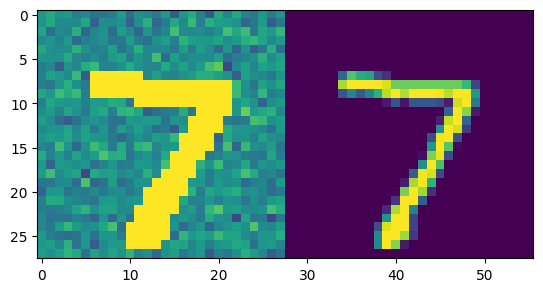

In [85]:
print(np.concatenate([test_noisy_images[0], test_images[0]], axis = 1).shape)
plt.imshow(np.concatenate([test_noisy_images[0], test_images[0]], axis = 1))
plt.show()

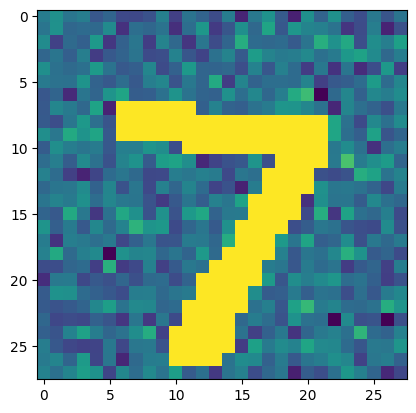

In [80]:
plt.imshow(test_noisy_images[0])

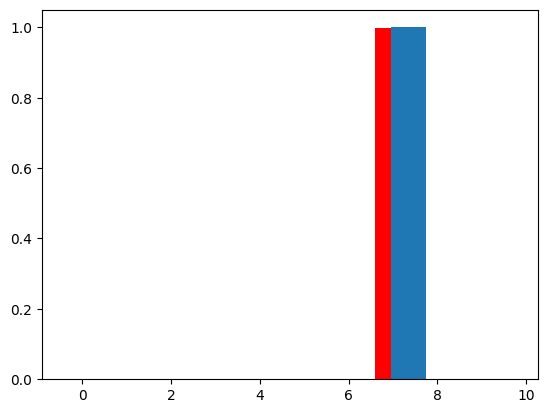

In [99]:
plt.bar(range(10), res[0], color ='red')
plt.bar(np.array(range(10)) + 0.35, test_labels[0])
plt.show()

## 7. 모델 저장 및 다운

In [100]:
model.save('./lecture001.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
new_model = tf.keras.models.load_model('./lecture001.h5')

1/1 [==============================] - 0s 37ms/step


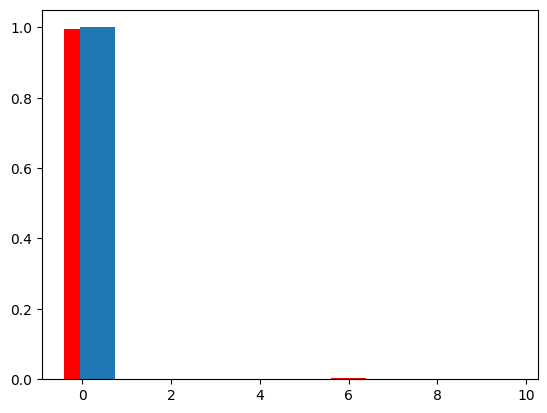

In [104]:
res = new_model.predict(test_noisy_images[3].reshape(1, 28, 28))
res.shape

plt.bar(range(10), res[0], color ='red')
plt.bar(np.array(range(10)) + 0.35, test_labels[3])
plt.show()

In [106]:
loss, acc =new_model.evaluate(test_noisy_images, test_labels, verbose =2)
print(loss, acc)
loss, acc =model.evaluate(test_noisy_images, test_labels, verbose =2)
print(loss, acc)

313/313 - 2s - loss: 0.2591 - accuracy: 0.9230 - 2s/epoch - 6ms/step
0.25906580686569214 0.9229999780654907
313/313 - 1s - loss: 0.2591 - accuracy: 0.9230 - 1s/epoch - 4ms/step
0.25906580686569214 0.9229999780654907


In [107]:
from google.colab import files
files.download('/content/lecture001.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>